# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

In [1]:
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 25.87 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)



## TODO Study Examples

In the folders

Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs

and 

Jove/For_CS3100_Fall2020/18_More_TM_Exs

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

## TODO Write a Summary

Describe what you learned about TMs of both varieties.

## TODO Create a DTM to Delete a Character

This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


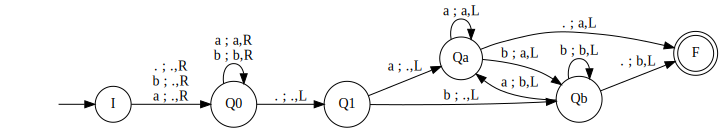

In [21]:
deleteChar = md2mc('''
TM 

I : a ; . , R -> Q0
I : b ; . , R -> Q0
I : . ; . , R -> Q0

Q0 : a ; a , R -> Q0
Q0 : b ; b , R -> Q0
Q0 : . ; . , L -> Q1

Q1 : a ; . , L -> Qa
Q1 : b ; . , L -> Qb

Qa : a ; a , L -> Qa
Qa : b ; a , L -> Qb
Qa : . ; a , L -> F

Qb : a ; b , L -> Qa
Qb : b ; b , L -> Qb
Qb : . ; b , L -> F

''')
dotObj_tm(deleteChar, FuseEdges=True)

In [25]:
explore_tm(deleteChar, "baabab", 100)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F', 7, '........aabab.........', 87)
 via .. 
 ->('I', 0, 'baabab', 100)
 ->('Q0', 1, '.aabab', 99)
 ->('Q0', 2, '.aabab', 98)
 ->('Q0', 3, '.aabab', 97)
 ->('Q0', 4, '.aabab', 96)
 ->('Q0', 5, '.aabab', 95)
 ->('Q0', 6, '.aabab', 94)
 ->('Q1', 5, '.aabab........', 93)
 ->('Qb', 4, '.aaba.........', 92)
 ->('Qa', 3, '.aabb.........', 91)
 ->('Qb', 2, '.aaab.........', 90)
 ->('Qa', 1, '.abab.........', 89)
 ->('Qa', 0, '.abab.........', 88)
 ->('F', 7, '........aabab.........', 87)


## TODO Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


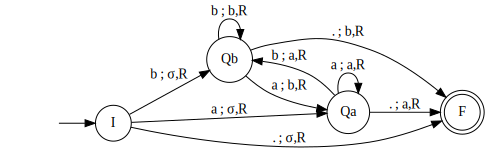

In [30]:
insertChar = md2mc('''
TM 

I : a ; σ , R -> Qa
I : b ; σ , R -> Qb
I : . ; σ , R -> F

Qa : a ; a , R -> Qa
Qa : b ; a , R -> Qb
Qa : . ; a , R -> F

Qb : a ; b , R -> Qa
Qb : b ; b , R -> Qb
Qb : . ; b , R -> F

''')
dotObj_tm(insertChar, FuseEdges=True)

In [31]:
explore_tm(insertChar, "baabab", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 7, 'σbaabab.......', 93)
 via .. 
 ->('I', 0, 'baabab', 100)
 ->('Qb', 1, 'σaabab', 99)
 ->('Qa', 2, 'σbabab', 98)
 ->('Qa', 3, 'σbabab', 97)
 ->('Qb', 4, 'σbaaab', 96)
 ->('Qa', 5, 'σbaabb', 95)
 ->('Qb', 6, 'σbaaba', 94)
 ->('F', 7, 'σbaabab.......', 93)


## TODO Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

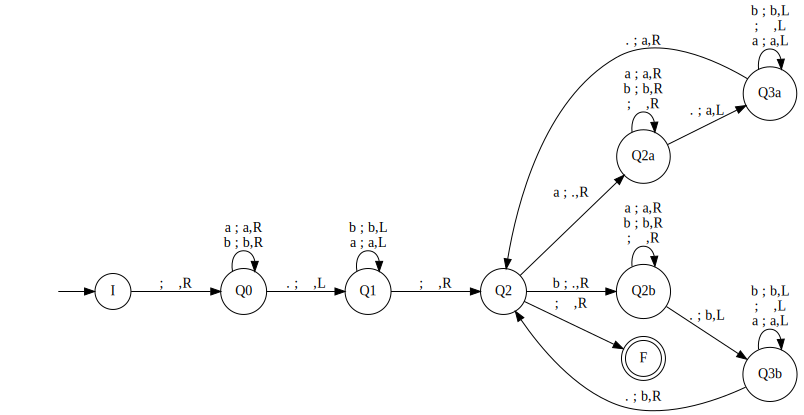

In [59]:
copyString = md2mc('''
TM 

I : ⊔ ; ⊔ , R -> Q0

Q0 : a ; a , R -> Q0
Q0 : b ; b , R -> Q0
Q0 : . ; ⊔ , L -> Q1

Q1 : a ; a , L -> Q1
Q1 : b ; b , L -> Q1
Q1 : ⊔ ; ⊔ , R -> Q2

Q2 : a ; . , R -> Q2a
Q2 : b ; . , R -> Q2b
Q2 : ⊔ ; ⊔ , R -> F

Q2a : a ; a , R -> Q2a
Q2a : b ; b , R -> Q2a
Q2a : ⊔ ; ⊔ , R -> Q2a
Q2a : . ; a , L -> Q3a

Q2b : a ; a , R -> Q2b
Q2b : b ; b , R -> Q2b
Q2b : ⊔ ; ⊔ , R -> Q2b
Q2b : . ; b , L -> Q3b

Q3a : a ; a , L -> Q3a
Q3a : b ; b , L -> Q3a
Q3a : ⊔ ; ⊔ , L -> Q3a
Q3a : . ; a , R -> Q2

Q3b : a ; a , L -> Q3b
Q3b : b ; b , L -> Q3b
Q3b : ⊔ ; ⊔ , L -> Q3b
Q3b : . ; b , R -> Q2

''')
dotObj_tm(copyString, FuseEdges=True)

In [60]:
explore_tm(copyString, "⊔bab", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 5, '⊔bab⊔bab....', 63)
 via .. 
 ->('I', 0, '⊔bab', 100)
 ->('Q0', 1, '⊔bab', 99)
 ->('Q0', 2, '⊔bab', 98)
 ->('Q0', 3, '⊔bab', 97)
 ->('Q0', 4, '⊔bab', 96)
 ->('Q1', 3, '⊔bab⊔.......', 95)
 ->('Q1', 2, '⊔bab⊔.......', 94)
 ->('Q1', 1, '⊔bab⊔.......', 93)
 ->('Q1', 0, '⊔bab⊔.......', 92)
 ->('Q2', 1, '⊔bab⊔.......', 91)
 ->('Q2b', 2, '⊔.ab⊔.......', 90)
 ->('Q2b', 3, '⊔.ab⊔.......', 89)
 ->('Q2b', 4, '⊔.ab⊔.......', 88)
 ->('Q2b', 5, '⊔.ab⊔.......', 87)
 ->('Q3b', 4, '⊔.ab⊔b......', 86)
 ->('Q3b', 3, '⊔.ab⊔b......', 85)
 ->('Q3b', 2, '⊔.ab⊔b......', 84)
 ->('Q3b', 1, '⊔.ab⊔b......', 83)
 ->('Q2', 2, '⊔bab⊔b......', 82)
 ->('Q2a', 3, '⊔b.b⊔b......', 81)
 ->('Q2a', 4, '⊔b.b⊔b......', 80)
 ->('Q2a', 5, '⊔b.b⊔b......', 79)
 ->('Q2a', 6, '⊔b.b⊔b......', 78)
 ->('Q3a', 5, '⊔b.b⊔ba.....', 77)
 ->('Q3a', 4, '⊔b.b⊔ba.....', 76)
 ->('Q3a', 3, '⊔b.b⊔ba.....', 75)
 ->('Q3a', 2, '⊔b.b⊔ba.....', 74)
 ->('Q2'

## TODO Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [61]:
def tep1(x):
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

1
1
1
1
1


Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [62]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

1


# TODO Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.
